Apply factor analysis on the dataset (WRA+EPA, 2015-2019, first aquifer) to see if there is any difference comparing to the WRA's yearly factor analysis result. Also PCA and CA are applied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Read data

In [2]:
path = 'G:\\Shared drives\\科技部水利署計畫_子計畫四'
data_df = pd.read_excel('{}\\data\\wra_2015-2019_data.xlsx'.format(path), sheet_name='delet empty data', index_col=0)
data_df.head()

,ID,WellName,Aquifer,data source,sampling date,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),...,Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
no.,,,,,,,,,,,,,,,,,,,,,
1,8060111,新光(1),1,wra,2015-03-24,16.7,3.2,0.01,19.1,13.6,...,0.003,0.0005,0.003,0.0025,0.003,0.003,23.9,5.33,385.0,0.5
2,9020111,溫厝(1),1,wra,2015-03-31,6.8,59.9,0.89,53.0,12.6,...,1.060,0.0005,0.003,0.0025,0.003,0.003,24.1,6.33,501.0,0.7
3,10040111,三和(1),1,wra,2015-03-31,25.5,63.4,0.66,71.0,22.0,...,0.397,0.0005,0.003,0.0060,0.118,0.003,25.7,6.16,630.0,0.5
4,9070311,古坑(1),1,wra,2015-03-31,11.8,43.8,0.01,37.8,16.2,...,0.003,0.0005,0.003,0.0025,0.013,0.003,24.4,5.96,427.0,0.2
5,9070111,東和(1),1,wra,2015-03-31,44.7,337.0,1.44,168.0,101.0,...,0.304,0.0010,0.003,0.0070,0.007,0.003,25.1,6.12,412.0,1.0


In [3]:
data_df.isna().any()

ID               False
WellName         False
Aquifer          False
data source      False
sampling date    False
CL(mg/L)         False
SO4(mg/L)        False
NH3_N(mg/L)      False
Ca(mg/L)         False
Mg(mg/L)         False
K(mg/L)          False
Na(mg/L)         False
Aso              False
Fe(mg/L)         False
Mn(mg/L)         False
Cd(mg/L)         False
Cr(mg/L)         False
Cu(mg/L)         False
Zn(mg/L)         False
Pb(mg/L)         False
Temp(℃)          False
PH               False
EC(uS/cm)        False
TOC(mg/L)        False
dtype: bool

Okay, there is a na in Aso.

In [4]:
data_df.iloc[:, 5:].describe()

,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,1079.177848,291.198999,1.076572,143.667785,102.232793,26.534386,559.833228,0.023529,12.498311,0.905331,0.000654,0.001842,0.002536,0.025827,0.002026,26.843397,8.419768,3536.286287,1.611245
std,3744.892263,509.428330,2.122332,87.227864,250.509888,71.807338,1870.682850,0.062155,217.640530,5.686554,0.001432,0.002101,0.002821,0.106769,0.009479,1.455361,32.663467,8735.374771,1.141303
min,0.650000,0.850000,0.000000,3.490000,0.734000,0.534000,5.350000,0.000150,0.002500,0.002500,0.000500,0.000500,0.000500,0.001000,0.000150,22.500000,5.290000,131.000000,0.100000
25%,20.375000,58.175000,0.080000,79.000000,20.300000,2.165000,25.100000,0.000700,0.037000,0.132250,0.000500,0.000500,0.000500,0.003000,0.000150,25.725000,6.700000,712.750000,0.700000
50%,34.600000,145.500000,0.340000,131.000000,32.100000,4.840000,37.450000,0.004200,0.520000,0.361500,0.000500,0.000500,0.001000,0.007000,0.000150,26.800000,6.900000,1040.000000,1.400000
75%,71.250000,287.250000,1.240000,189.000000,59.900000,13.550000,76.875000,0.017075,3.580000,0.901250,0.000500,0.003000,0.003000,0.011000,0.002500,27.900000,7.140000,1555.000000,2.350000
max,40300.000000,7360.000000,18.000000,657.000000,2980.000000,785.000000,16400.000000,0.640000,4740.000000,123.000000,0.030000,0.008000,0.017000,0.973000,0.198000,31.100000,718.000000,48600.000000,8.500000


# Try FA
The dataset is standardized.

In [5]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(data_df.iloc[:, 5:])
fa = FactorAnalysis()
fa.fit(X_std)

FactorAnalysis()

In [6]:
fa_df = pd.DataFrame(fa.components_[:5], index=['F{}'.format(_) for _ in range(1, 6)], columns=data_df.columns[5:])
fa_df

,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
F1,0.964335,0.891473,0.301499,0.579492,0.971247,0.962118,0.964741,0.035772,0.151946,0.161450,-0.025382,-0.080938,-0.016625,0.003380,0.120605,0.077854,-0.002594,0.806355,-0.067050
F2,0.104061,-0.162158,0.107746,-0.135171,-0.054830,-0.058191,-0.043529,0.044636,0.904376,0.889227,0.046677,0.233395,0.179648,0.488268,0.928569,-0.058785,0.003350,-0.141913,-0.131743
F3,-0.026837,-0.006402,-0.282797,0.222071,-0.026426,-0.023214,-0.018765,-0.421658,0.179389,0.215982,-0.283394,-0.798411,-0.783990,-0.066912,-0.016695,0.411616,-0.049556,0.031247,0.442774
F4,-0.018085,0.011155,0.366446,0.120942,-0.004320,0.006476,-0.033093,0.539948,0.022151,0.030774,0.450231,-0.112410,0.018185,-0.082111,-0.013121,0.308453,-0.030726,-0.057963,0.383940
F5,-0.028637,0.182094,-0.010983,0.358579,0.014204,-0.028144,-0.072459,-0.085514,0.004613,0.011621,-0.172031,0.069919,0.148561,-0.019186,0.013232,0.065586,0.128561,-0.187898,0.081899


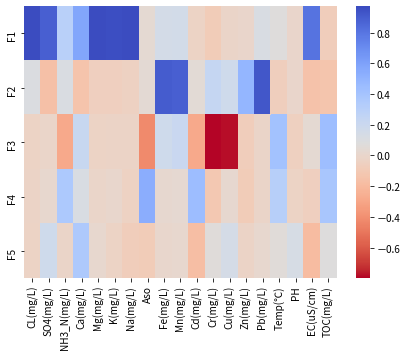

In [5]:
plt.figure(figsize=(7, 5))
sns.heatmap(fa_df, cmap='coolwarm_r')
plt.savefig('{}\\results\\2015-2019_FA_loading_{}.png'.format(path, date))

# Try PCA
Also using the standardized dataset.

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

PCA()

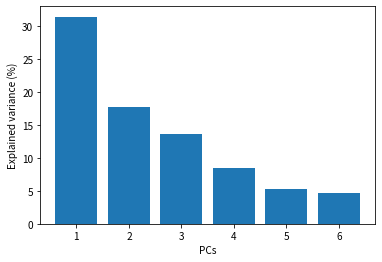

In [10]:
plt.bar(range(1, 7), pca.explained_variance_ratio_[:6]*100)
plt.xlabel('PCs')
plt.ylabel('Explained variance (%)')
plt.savefig('{}\\results\\2015-2019_PCA_variance_{}.png'.format(path, date))

In [37]:
comp_df = pd.DataFrame(pca.components_[:5].T, columns=['PC{}'.format(_) for _ in range(1, 6)], index=data_df.columns[5:])
comp_df.to_csv('{}/results/2015-2019_PCA_loadings_AN.csv'.format(path))
comp_df

,PC1,PC2,PC3,PC4,PC5
CL(mg/L),0.398911,0.064818,-0.015231,-0.041790,-0.039124
SO4(mg/L),0.373427,-0.085584,-0.050112,-0.033683,0.074497
NH3_N(mg/L),0.135995,0.116356,-0.201112,0.352548,-0.013063
Ca(mg/L),0.263441,-0.120719,0.104602,0.080850,0.206866
Mg(mg/L),0.402778,-0.021369,-0.046484,-0.035351,-0.020554
K(mg/L),0.398084,-0.023604,-0.044701,-0.018850,-0.040240
Na(mg/L),0.399019,-0.016232,-0.039815,-0.055396,-0.052033
Aso,0.016972,0.103901,-0.315244,0.520540,-0.009719
Fe(mg/L),0.069042,0.457478,0.289939,0.041248,0.015757
Mn(mg/L),0.073843,0.441996,0.310783,0.051436,0.016832


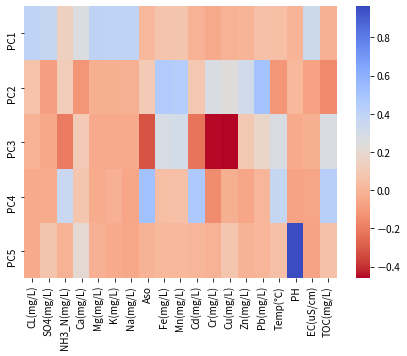

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(comp_df.T, cmap='coolwarm_r')
plt.savefig('{}\\results\\2015-2019_PCA_loading_{}.png'.format(path, date))

In [39]:
pc_df = pd.DataFrame(pca.transform(X_std)[:, :5], columns=['PC{}'.format(_) for _ in range(1, 6)])
pc_df

,PC1,PC2,PC3,PC4,PC5
0,-1.404819,0.565528,-0.956760,-1.689509,-0.521560
1,-1.180069,0.674136,-0.940989,-1.201492,-0.389674
2,-1.072552,1.124944,-1.293723,-0.800255,-0.220662
3,-1.294398,0.564900,-0.907127,-1.669031,-0.450466
4,-0.425946,0.800644,-1.779390,-0.103589,0.074023
...,...,...,...,...,...
469,-1.386060,0.030445,-0.335316,-1.651950,-0.536316
470,-0.760522,-0.547479,1.080762,0.160303,-0.041098
471,-0.874236,-0.332974,0.327731,-0.158857,-0.161901
472,-0.599441,-0.455384,0.620734,-0.507268,-0.089695


In [41]:
pc_df.to_csv('{}/results/2015-2019_PCA_scores_AN.csv'.format(path))

The significant agreement between FA and PCA loadings implies the robustness of the dimensionality reduction.

# Try CA
This step is used to help Kuo debug.

In [30]:
from sklearn.cluster import AgglomerativeClustering

ca = AgglomerativeClustering(n_clusters=5)
ca.fit(pc_df.iloc[:, :2])

AgglomerativeClustering(n_clusters=5)

In [31]:
out = pc_df.iloc[:, :2].copy()
out['C2'] = ca.labels_
out

,PC1,PC2,C2
0,-0.574839,0.307648,1
1,-0.482873,0.366731,1
2,-0.438879,0.611972,1
3,-0.529656,0.307307,1
4,-0.174293,0.435552,1
...,...,...,...
469,-0.567163,0.016562,3
470,-0.311199,-0.297830,3
471,-0.357730,-0.181139,3
472,-0.245286,-0.247730,3


In [40]:
out.to_csv('{}/results/2015-2019_PCA_scores+CA_AN.csv'.format(path))